<a href="https://colab.research.google.com/github/Amitkundu22/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

##**Importing The Libraries**

In [108]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest


#**Importing and loading our dataset**

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading csv file
data= pd.read_csv ("/content/drive/MyDrive/Almabetter Bank-Marketing-Effectiveness-Prediction Capstone Project/bank-full.csv",sep=';')
df=data.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


#**Understanding of Dataset**

In [6]:
df.shape

(45211, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#detail informations of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#**Checking null values**

In [9]:
# check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

####**There are no null values in the dataset**

#**Checking unique and duplicate values**


In [10]:
# checking unique values
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
#Checking duplicate values
df.duplicated().sum()

0

####**There are no duplicate values present in the dataset**

In [12]:
# statistical summary of our data
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


#**DESCRIPTIVE ANALYSIS**
###There are two types of variable in our data
**1**.**Numerical** 

**2**.**Catagorical** 



###**List of Numerical features**

In [13]:
# list of numerical features
numerical_feature = list(df.select_dtypes(exclude=['object']))
numerical_feature


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

###**List of Catagorial features**

In [14]:
# list of catagorical features
categorical_feature = list(df.select_dtypes(include=['object']))
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

#**EXPLORATORY DATA ANALYSIS (EDA)**

#**Target Variable**

####**Target Variable : y - has the client subscribed a term deposit (binary: 'yes', 'no')**

In [15]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

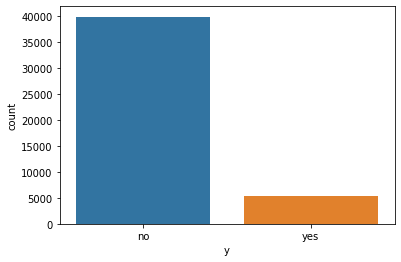

In [16]:
# Visualising the target variable
y_df = sns.countplot(df['y'])

####**As We Can See that our data is highly imbalanced, because majority of the data points belong to 'no' class.**

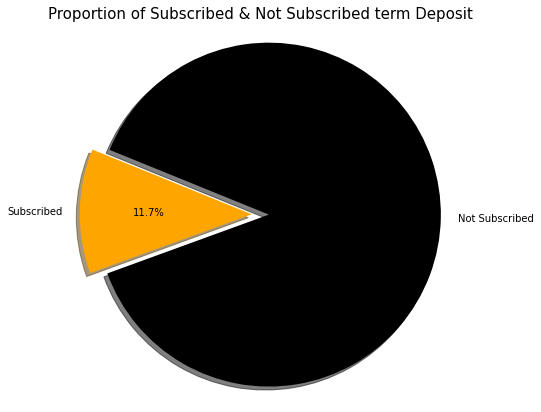

In [17]:
# piechart for percentage of number of subscribers and non-subscribers for term deposit(Traget Variable)
labels = 'Not Subscribed' , 'Subscribed'
sizes = df.y.value_counts()
colors = ['black', 'orange']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title("Proportion of Subscribed & Not Subscribed term Deposit",fontsize=15)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,7)
plt.show()

####**We can see from the above plot that the dataset is imbalanced, where the number of Not-Subscribed class is close to 8 times the number of Subscribed Class.**

#**Univariate Analysis**

###**Let's begin performing EDA on the remaining columns of datapoints.**

##**Explore the Categorical Features**

Column name :  job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


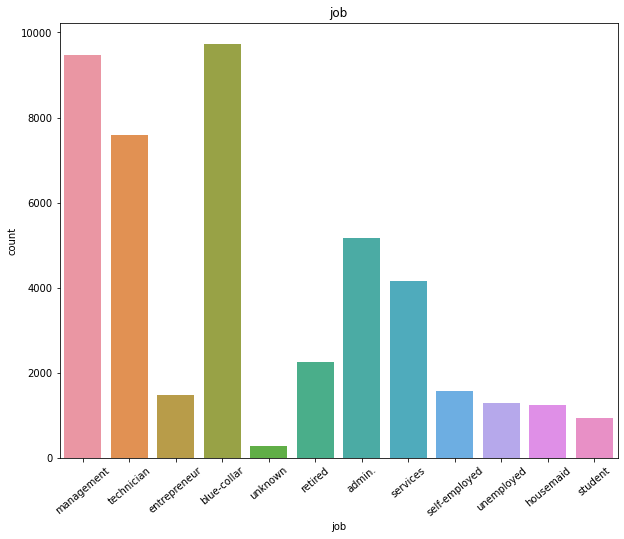

Column name :  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


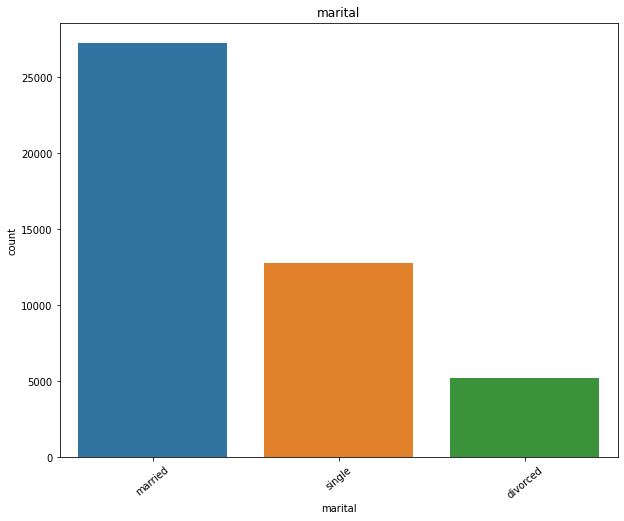

Column name :  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


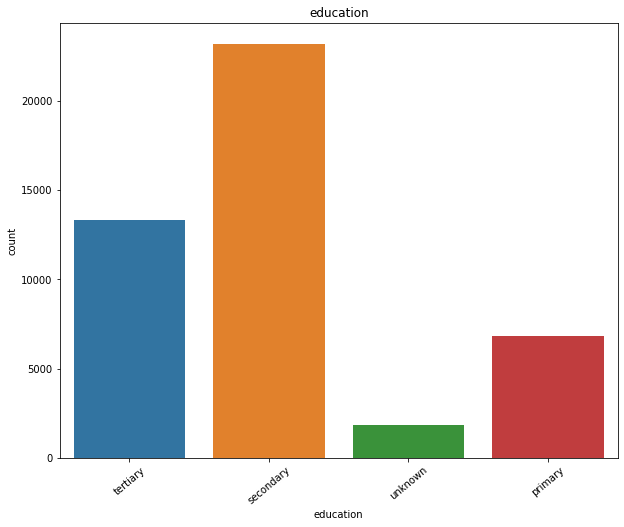

Column name :  default
no     44396
yes      815
Name: default, dtype: int64


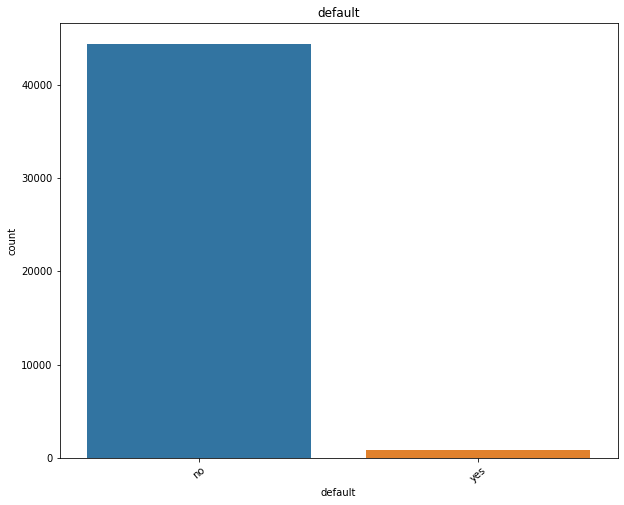

Column name :  housing
yes    25130
no     20081
Name: housing, dtype: int64


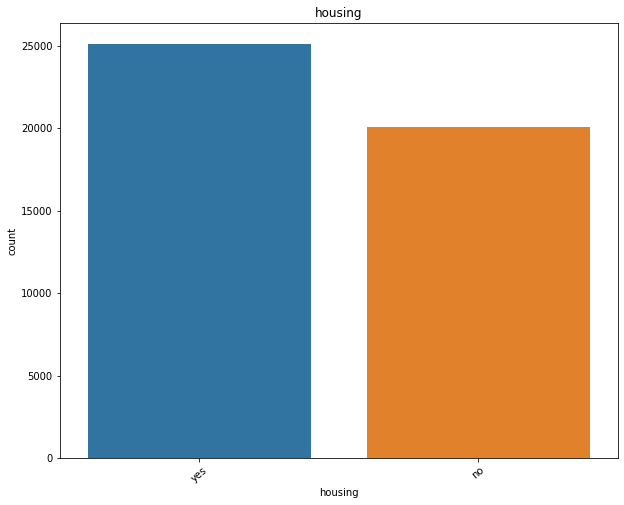

Column name :  loan
no     37967
yes     7244
Name: loan, dtype: int64


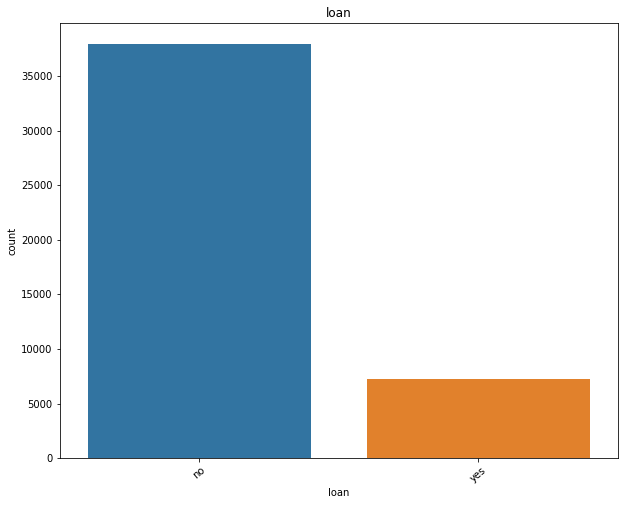

Column name :  contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


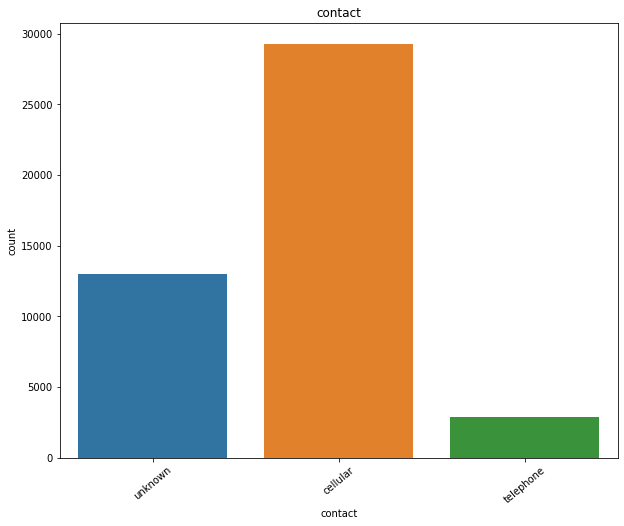

Column name :  month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


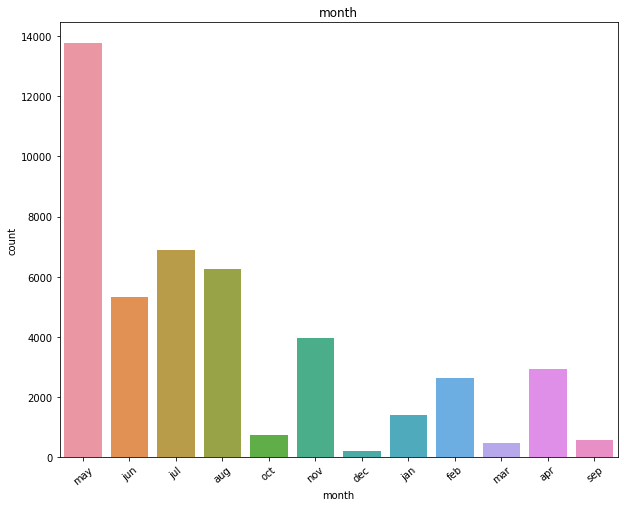

Column name :  poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


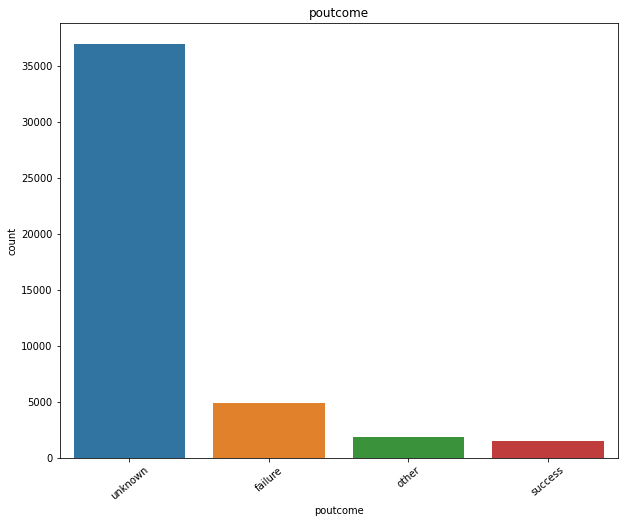

Column name :  y
no     39922
yes     5289
Name: y, dtype: int64


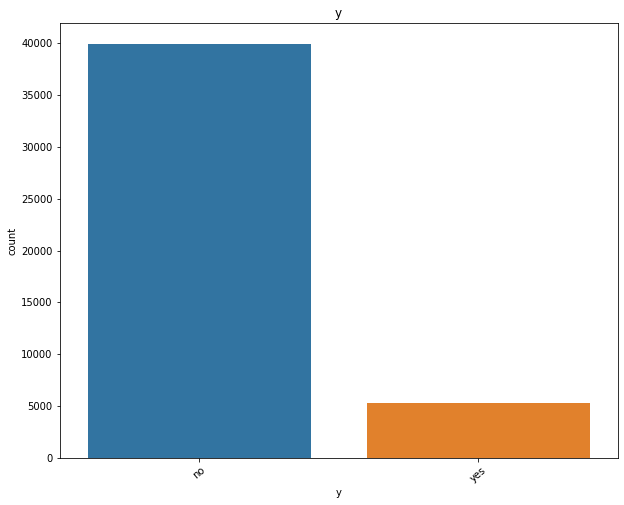

In [18]:
# Each variable is represented by a bar graph.

#Countplot of categorical features
for i in categorical_feature:
  print('Column name : ' , i)
  print(data[i].value_counts())
  plt.figure(figsize=(10,8))
  sns.countplot(x = data[i])
  plt.xlabel(i)
  plt.title(format(i))
  plt.xticks(rotation=40)
  plt.show()

###**Categorical variable's graph representation related to the target variable**

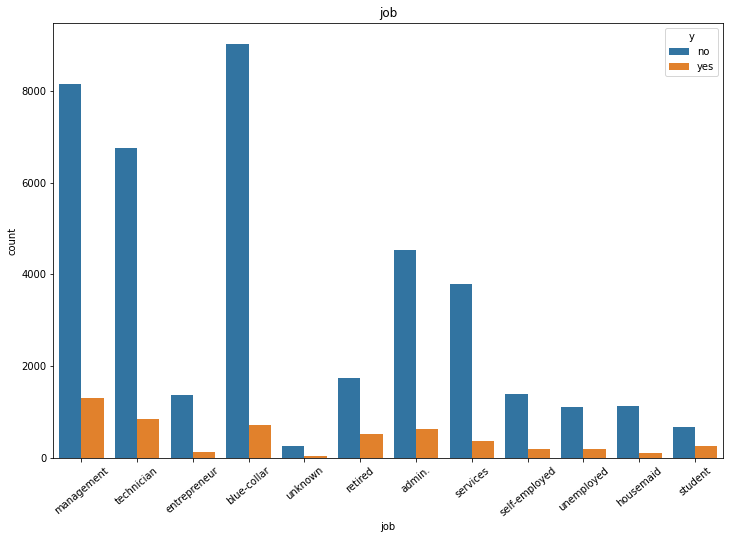

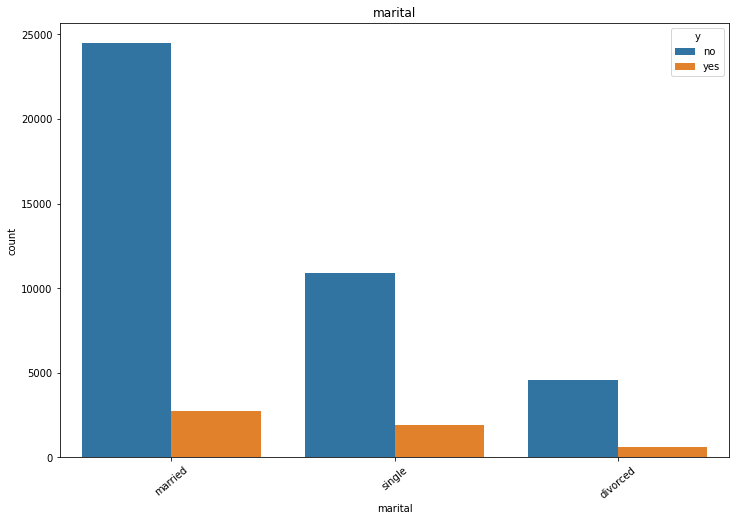

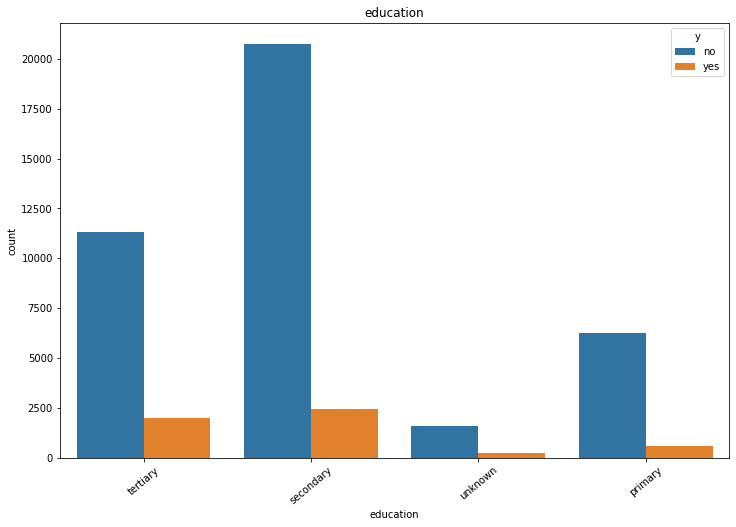

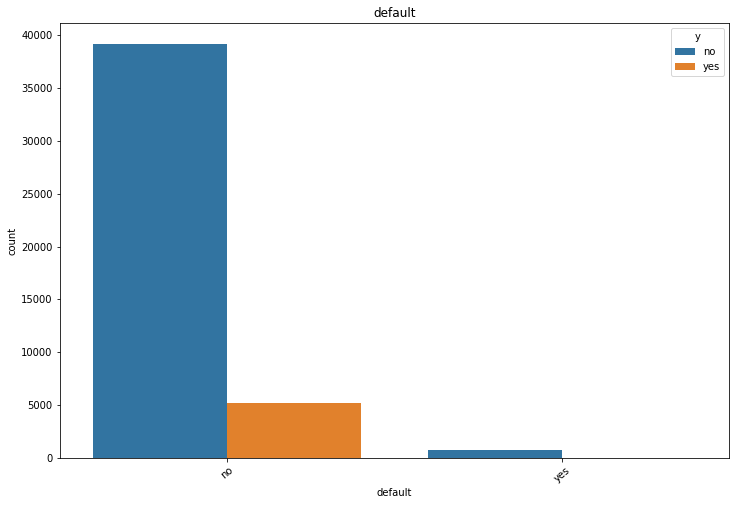

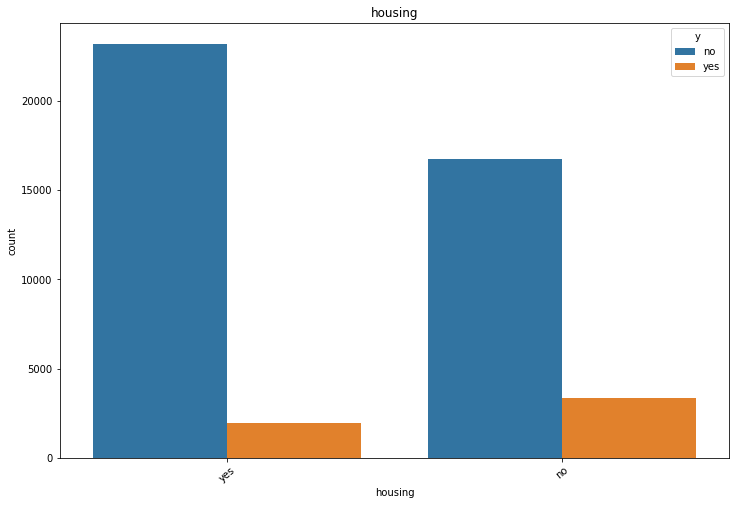

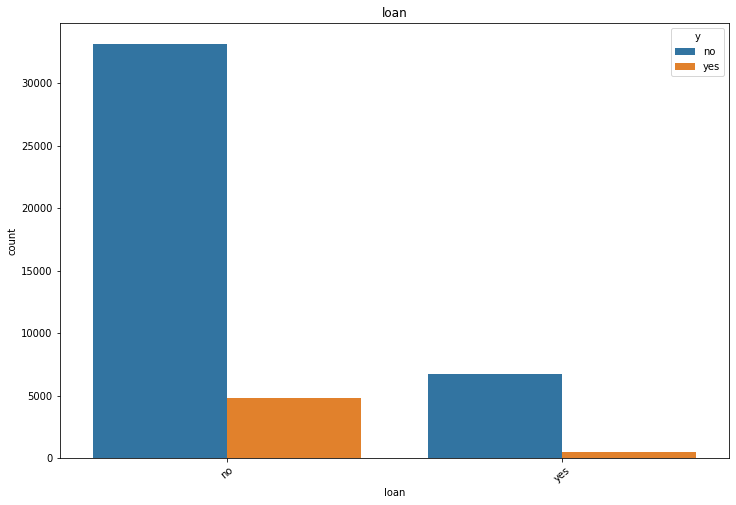

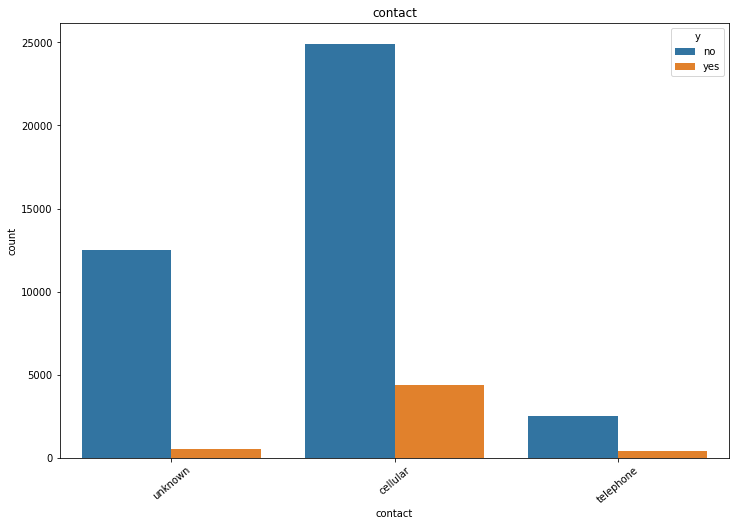

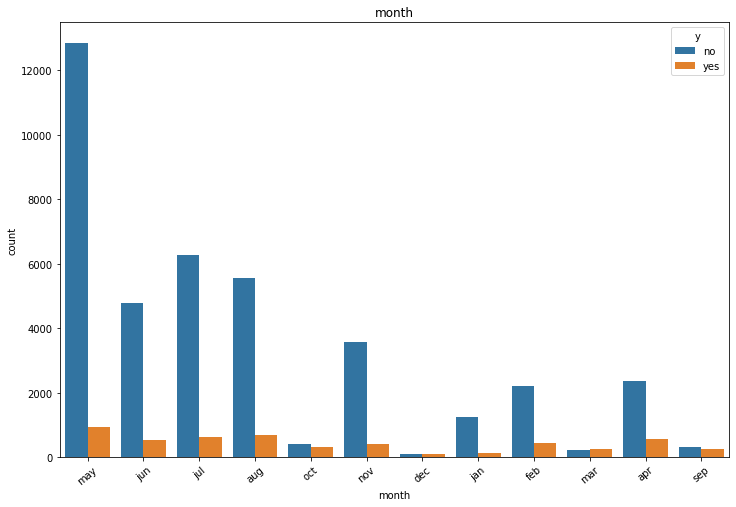

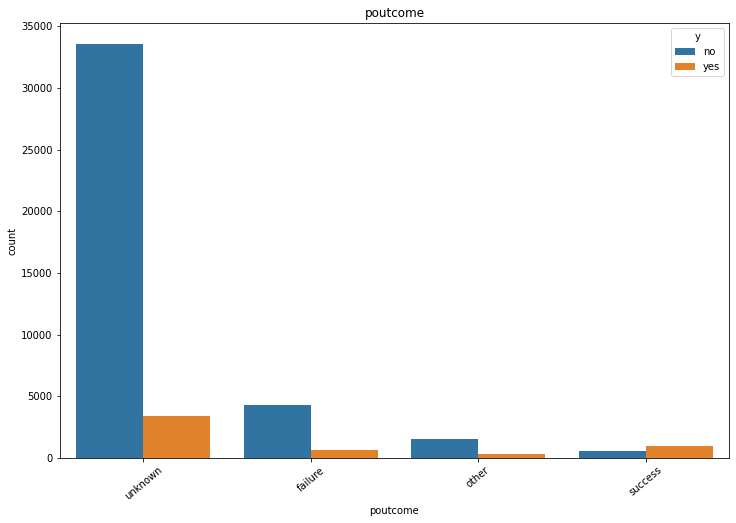

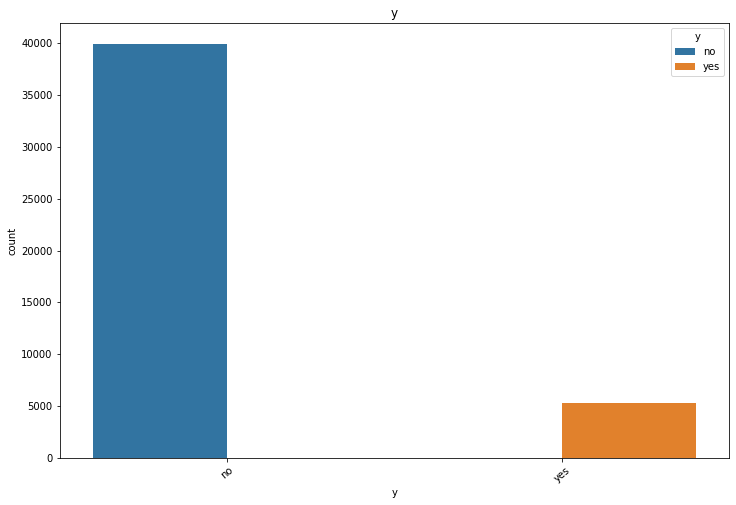

In [19]:
#Countplot of categorical features
for i in categorical_feature:
  plt.figure(figsize=(12,8))
  sns.countplot(x = data[i] , hue=data['y'])
  plt.xlabel(i)
  plt.title(format(i))
  plt.xticks(rotation=40)
  plt.show()

#**From the above plots we can analyze that:**

####**Top clients are from the 'blue-collar','management', and 'technician' employment types.**
####**Retired client has high interest on deposit.**
####**In month of March, September, October and December, client show high interest to deposit.**
####**In month of may, records are high but client interest ratio is very less.**
####**Success rate is highest for student.**
####**People whose previous outcome is non-existent have actually subscribed more than any other group of people belonging to previous outcome.**
####**Very few clients are contacted who are defaulter.**
####**People who are married have subscribed for deposits more than people with any other marital status.**
####**Client who has housing loan seems to be not interested much on deposit**


##**Explore the numerical_feature**

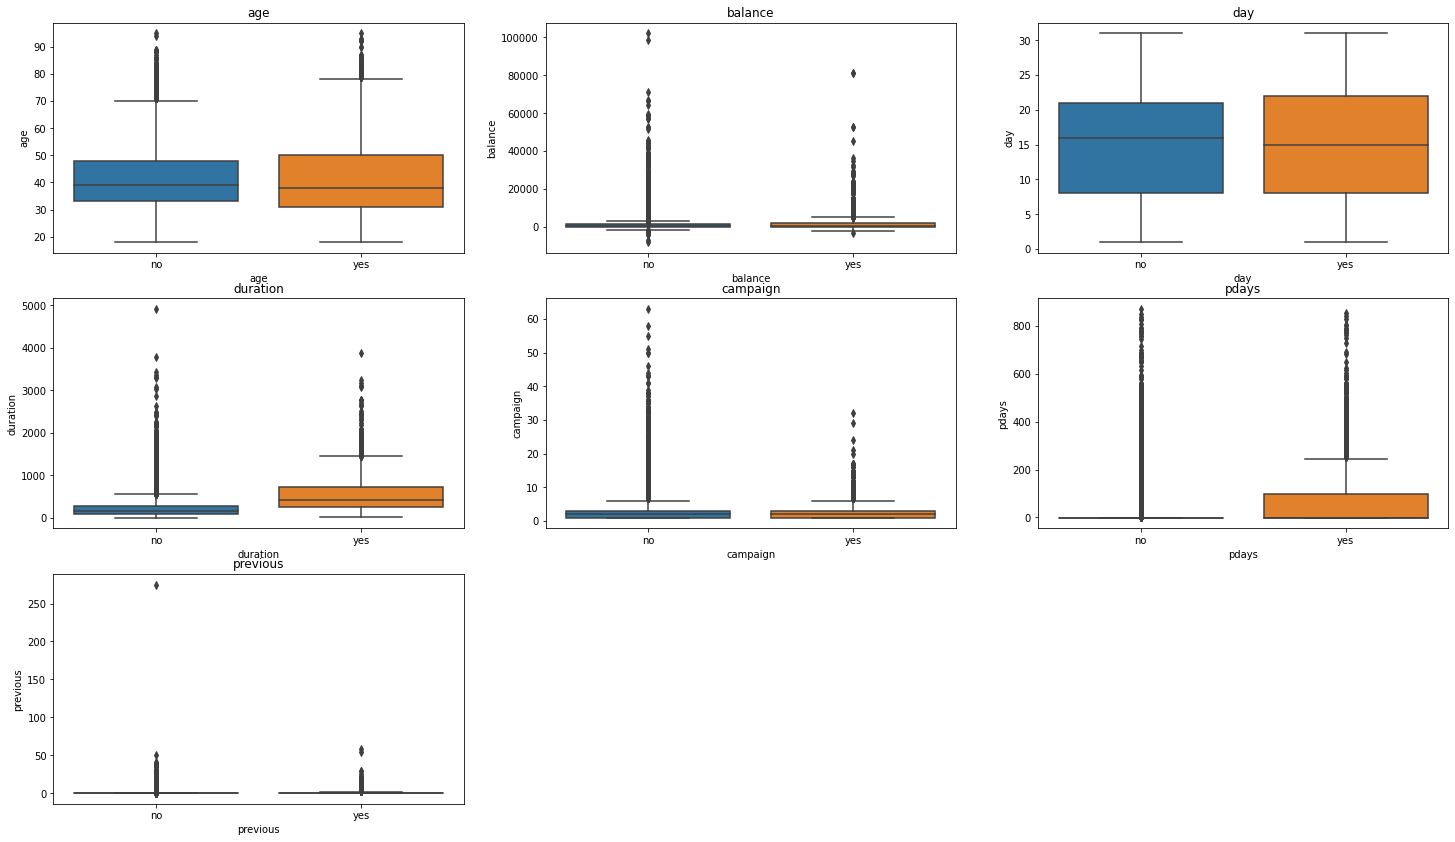

In [20]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(25,60), facecolor='white')
plotnumber =1
for i in numerical_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[i],data=df)
    plt.title(format(i))
    plt.xlabel(i)
    plotnumber+=1
plt.show()

####**Since the age feature is not linearly separable for each of the target variables, it is obvious from the above plot that the majority of customers  call are in between 30s to 40s (people who are 33 to 48 years old fall within the 25th to 75th percentiles). Age will therefore have less of an impact on us.**
####**As We can see that there are many Outliers in No part As well Yes Part but here our data is Imbalanced so we are keeping this Outliers.**


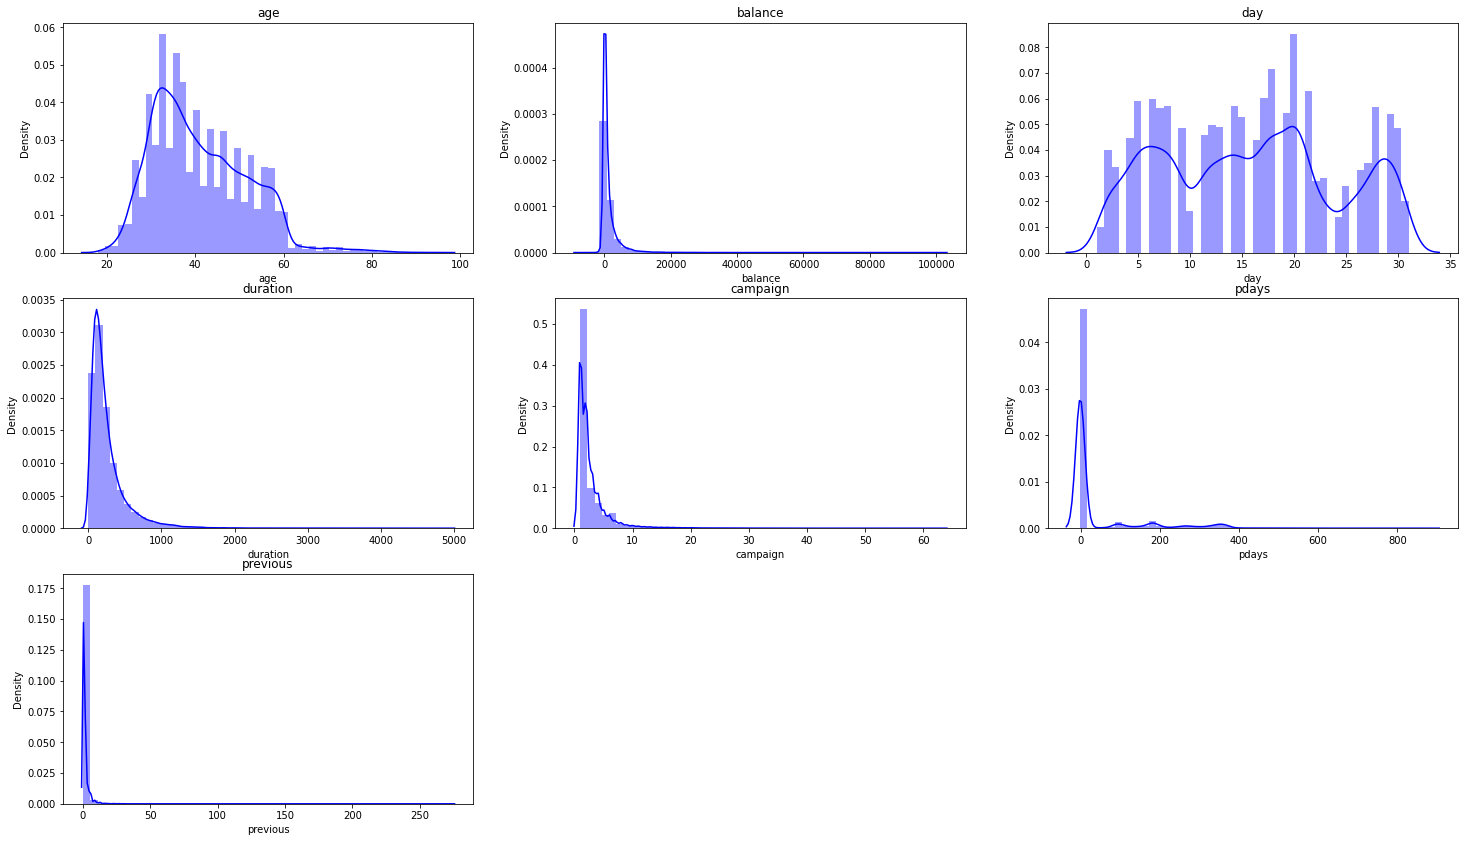

In [21]:
#Distribution plot of continuous feature
plt.figure(figsize=(25,60))
plotnumber =1
for i in numerical_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[i],color ='blue')
    plt.title(format(i))
    plt.xlabel(i)
    plotnumber+=1
plt.show()

#**Take-away:**

####**It seems age, days distributed normally.**

####**Balance, duration, campaign, pdays, and previous are all strongly left-skewed and appear to contain some outliers.**

####**The majority of the customers, as shown in the distribution above, are between the ages of 30 and 40.**

##**Correlation Matrix of the numerical features**

In [22]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


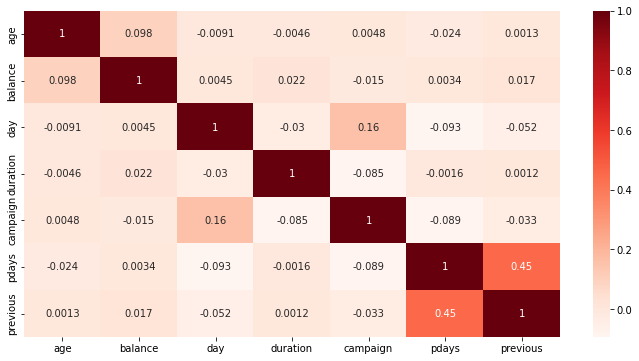

In [23]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(12,6))
sns.heatmap(cor_mat,annot=True, cmap =plt.cm.Reds)

####**There is no variable highly correlated to y (Target variable).**

#**Data Preprocessing**

In [24]:
df.shape

(45211, 17)

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



####**We can see there are some binary columns(default, housing, loan) which are object type, we need to convert into numeric value.**

####**There are categorical columns as well, but the options are few. These include job, marriage, education, contact, month, and outcome. That must also be transformed into a numerical format.**

####**The model can only be fed data when all feature columns have been converted to numeric values.**

####**To convert default column into numeric value We can convert the 'yes' values to 1, and the 'no' values to 0.**

##**Creating one-hot encoding for non-numeric MARITAL column**



In [26]:
marital_dummies = pd.get_dummies(df['marital'], prefix= 'marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [27]:
# combine the marital column and marital_dummies
pd.concat([df['marital'], marital_dummies], axis = 1).head()

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1


####**As we can see, each row has one value of 1, which corresponds to the value in the marital column in the corresponding column.**

####**There are three values; if two of the dummy columns' values for a given row are 0, the third column's value must be 1. Redundancy and correlations in features should be eliminated because it can be challenging to determine which feature is most crucial for minimising the overall error.**

####**So let's eliminate the column divorced.**

In [28]:
# Elimainating marital_divorced column
marital_dummies.drop('marital_divorced', axis =1, inplace = True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [29]:
# merging marital_dummies into main dataframe
df = pd.concat([df, marital_dummies], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


##**Creating one hot encoding for JOB column**

In [30]:
job_dummies = pd.get_dummies(df['job'], prefix= 'job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
# Elimainating job_admin column
job_dummies.drop('job_admin.', axis=1, inplace=True)

In [32]:
# Merging job_dummies into main dataframe
df = pd.concat([df, job_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


##**Creating one hot encoding for EDUCATION column**

In [33]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.head()

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [34]:
# Elimainating education_primary column
education_dummies.drop('education_primary', axis=1, inplace=True)

In [35]:
# Merging education_dummies into main dataframe
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


##**Creating one hot encoding for CONTACT column**

In [36]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.head()

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [37]:
# Elimainating contact_cellular column
contact_dummies.drop('contact_cellular', axis=1, inplace=True)

In [38]:
# Merging contact_dummies into main dataframe
df = pd.concat([df, contact_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,1,0,0,1,0,1


##**Creating one hot encoding for POUTCOME column**

In [39]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [40]:
# Elimainating poutcome_failure column
poutcome_dummies.drop('poutcome_failure', axis=1, inplace=True)

In [41]:
#Merging poutcome_dummies into main dataframe
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,1,0,0,1


####**We need to convert some binary columns that represent object types (default, housing, and loan) into numeric values.**
####**There are also categorical columns, but there are only a few options. Job,marriage, education, contacts, month, and poutcome are some of them.** **Additionally, that needs to be converted to numerical form. Only after all feature columns have been converted to numeric values can we feed them into the model.**

##**Converting month column into numeric value**

In [42]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
df['month'].head(5)

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

####**Changing the default column's value to numeric value  For the default column, we can change the yes values to 1 and the no values to 0. For it, we'll use a lambda function.**

##**Converting default column into numeric value**

In [43]:
df['new_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0 )
df[['default', 'new_default']].head()

,default,new_default
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [44]:
df[df['pdays'] == -1]['pdays'].count()

36954

In [45]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


##**Converting loan column into numeric value**

In [46]:
df['new_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)
df[['loan', 'new_loan']].head()

,loan,new_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0


##**Converting housing column into numeric value**

In [47]:
df['new_housing'] = df['housing'].apply(lambda row : 1 if row == 'yes' else 0)
df[['housing', 'new_housing']].head()

,housing,new_housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0


##**Converting target column ‘y’ into numeric value**

In [48]:
df['y_target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
df[['y', 'y_target']].head()

,y,y_target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,new_default,was_contacted,new_loan,new_housing,y_target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,0,0,1,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,0,0,0,0


####**Eliminating the columns for age, job, marital, education, default, housing, loan, day, contact, month, duration, poutcome, and y.**

In [50]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y','month','duration','age','day'], axis=1, inplace=True)


In [51]:
df.head()

,balance,campaign,pdays,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,new_default,was_contacted,new_loan,new_housing,y_target
0,2143,1,-1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,29,1,-1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,2,1,-1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
3,1506,1,-1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,1,1,-1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [52]:
df.dtypes

balance                int64
campaign               int64
pdays                  int64
previous               int64
marital_married        uint8
marital_single         uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
new_default            int64
was_contacted          int64
new_loan               int64
new_housing            int64
y_target               int64
dtype: object

In [53]:
df.shape


(45211, 30)

##**Removing outliers**

In [54]:
# removing the outlier using IsolationForest Technique

features = df.drop(['y_target'],axis=1)

anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(features))
df['new_anomaly'] = anomalies
df = df[df['new_anomaly']==1].drop(['new_anomaly'],axis=1)

In [55]:
df.shape


(40690, 30)

In [56]:
# Giving values to independent variables
X = df.drop('y_target', axis = 1)
X.head().T

,0,1,2,3,4
balance,2143,29,2,1506,1
campaign,1,1,1,1,1
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
marital_married,1,0,1,1,0
marital_single,0,1,0,0,1
job_blue-collar,0,0,0,1,0
job_entrepreneur,0,0,1,0,0
job_housemaid,0,0,0,0,0
job_management,1,0,0,0,0


In [57]:
# Giving the values of dependent variables
y = df['y_target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_target, dtype: int64

#**Oversampling using SMOTE**

##**SMOTE-**

####**'Synthetic Minority Oversampling Technique' (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input**

In [58]:
# Over sampling the data using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(X.values, y.values)

In [59]:
X.shape


(73040, 29)

In [60]:
y.shape

(73040,)

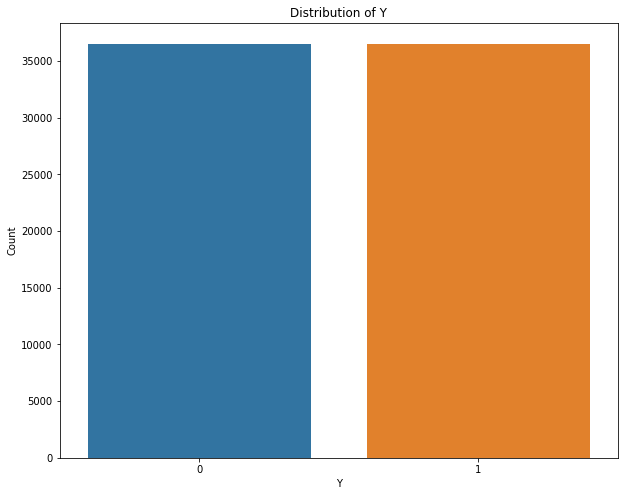

In [61]:
# countplot of dependent column y

plt.figure(figsize = (10,8))
sns.countplot(x = y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()

#**Model Building**

###**Logistic Regression**
###**Random Forest Classifier**
###**Decision Tree Classifier**
###**K-Nearest Neighbors (KNN)**
###**XGBoost Classifier**

#**Splitting data in Train and Test**

In [62]:
# Scale the data using Standard Scaler
ss = StandardScaler()
x = ss.fit_transform(X)

In [63]:
# splitting the dataset into the training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

#shape of training dataset.
print(f'shape of x_train set: {x_train.shape}')

#shape of testing dataset.
print(f'shape of x_test set: {x_test.shape}')

shape of x_train set: (54780, 29)
shape of x_test set: (18260, 29)


#**Implementing Various Machine learning Models**

#**1) Logistic Regression**

In [64]:
# Data fitting in Logistic Regression
log_reg = LogisticRegression(fit_intercept = True, max_iter = 10000)
log_reg.fit(x_train, y_train)

#prediction of test data
logistic_prediction = log_reg.predict(x_test)

# Get the accuracy scores
logistic_accuracy = accuracy_score(y_test,logistic_prediction)

#Checking the traning accuracy
print(f"Training accuracy Score : {log_reg.score(x_train, y_train)}")
#Checking the testing accuracy
print(f"Testing accuracy Score : {logistic_accuracy}" )

Training accuracy Score : 0.8680175246440307
Testing accuracy Score : 0.8640197152245345


In [65]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(logistic_prediction,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      9660
           1       0.84      0.88      0.86      8600

    accuracy                           0.86     18260
   macro avg       0.86      0.87      0.86     18260
weighted avg       0.87      0.86      0.86     18260



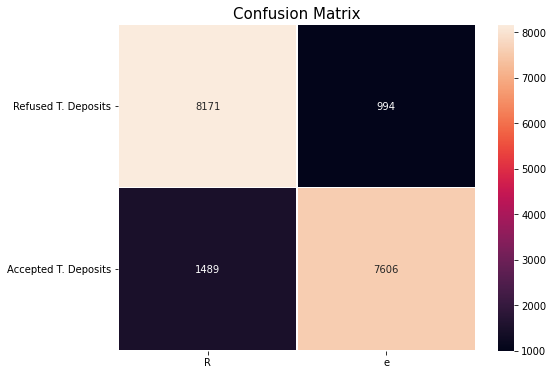

In [66]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,logistic_prediction)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt="d", linewidths=.5, ax=ax )
plt.title("Confusion Matrix", fontsize=15)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=10, rotation=360)
plt.show()

##**ROC AOC Curve for Logistic Regression**

In [67]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

# getting the roc_score
log_reg_probability = log_reg.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, log_reg_probability)
roc_score

0.9338660565102497

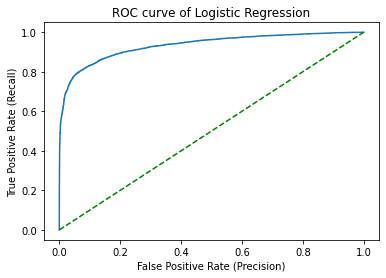

In [68]:
# plot the roc curve for the model
from sklearn.metrics import roc_curve
logistic_FPR, logistic_TPR, _ = roc_curve(y_test, log_reg_probability)

plt.title('ROC curve of Logistic Regression')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.plot(logistic_FPR,logistic_TPR)
plt.plot((0,1),ls='dashed',color='green')
plt.show()

#**2) Random Forest Classifier**

In [69]:
# Data fitting in Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

#prediction of test data
rf_prediction = rf_clf.predict(x_test)

# Get the accuracy scores
rf_accuracy = accuracy_score(y_test,rf_prediction)

#Checking the traning accuracy
print(f'Training accuracy Score : {rf_clf.score(x_train, y_train)}')
#Checking the testing accuracy
print(f'Testing accuracy Score : {rf_accuracy}')

Training accuracy Score : 0.9911646586345382
Testing accuracy Score : 0.8914567360350493


In [70]:
# Classification Report
print(classification_report(rf_prediction,y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      9065
           1       0.90      0.89      0.89      9195

    accuracy                           0.89     18260
   macro avg       0.89      0.89      0.89     18260
weighted avg       0.89      0.89      0.89     18260



##**Confusion Matrix for Random Forest Classifier**

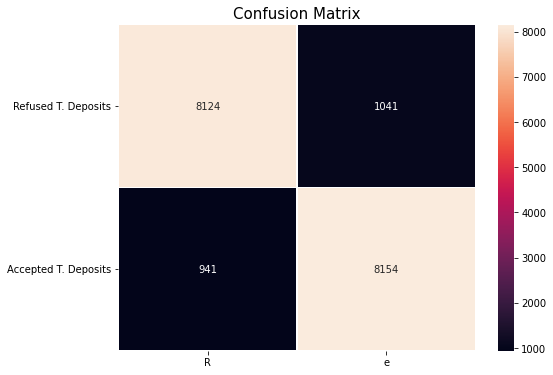

In [71]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,rf_prediction)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt="d", linewidths=.5, ax=ax )
plt.title("Confusion Matrix", fontsize=15)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=10, rotation=360)
plt.show()


##**ROC AOC Curve for Random Forest Classifier**

In [72]:
# getting the roc_score
rf_clf_probability = rf_clf.predict_proba(x_test)[:,1]
roc_socre=roc_auc_score(y_test, rf_clf_probability)
roc_socre

0.9485773404150346

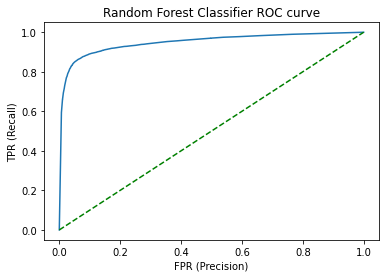

In [73]:
# plot the roc curve for the model

random_forest_FPR, random_forest_TPR,_ = roc_curve(y_test, rf_clf_probability)

plt.title('Random Forest Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(random_forest_FPR,random_forest_TPR)
plt.plot((0,1), ls='dashed',color='green')
plt.show()

##**Important Feature for Random Forest Classifier**

In [74]:
rf_clf.feature_importances_


array([0.27428368, 0.05906724, 0.02567503, 0.01241409, 0.05452891,
       0.03666282, 0.04775647, 0.01145337, 0.01640023, 0.03278589,
       0.01455498, 0.01284815, 0.02244761, 0.00411213, 0.03642372,
       0.01365068, 0.00238141, 0.03770929, 0.02929252, 0.00881059,
       0.01070662, 0.09536552, 0.00246185, 0.00516846, 0.00639465,
       0.00212739, 0.00383228, 0.03470804, 0.08597639])

In [75]:
features=df.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

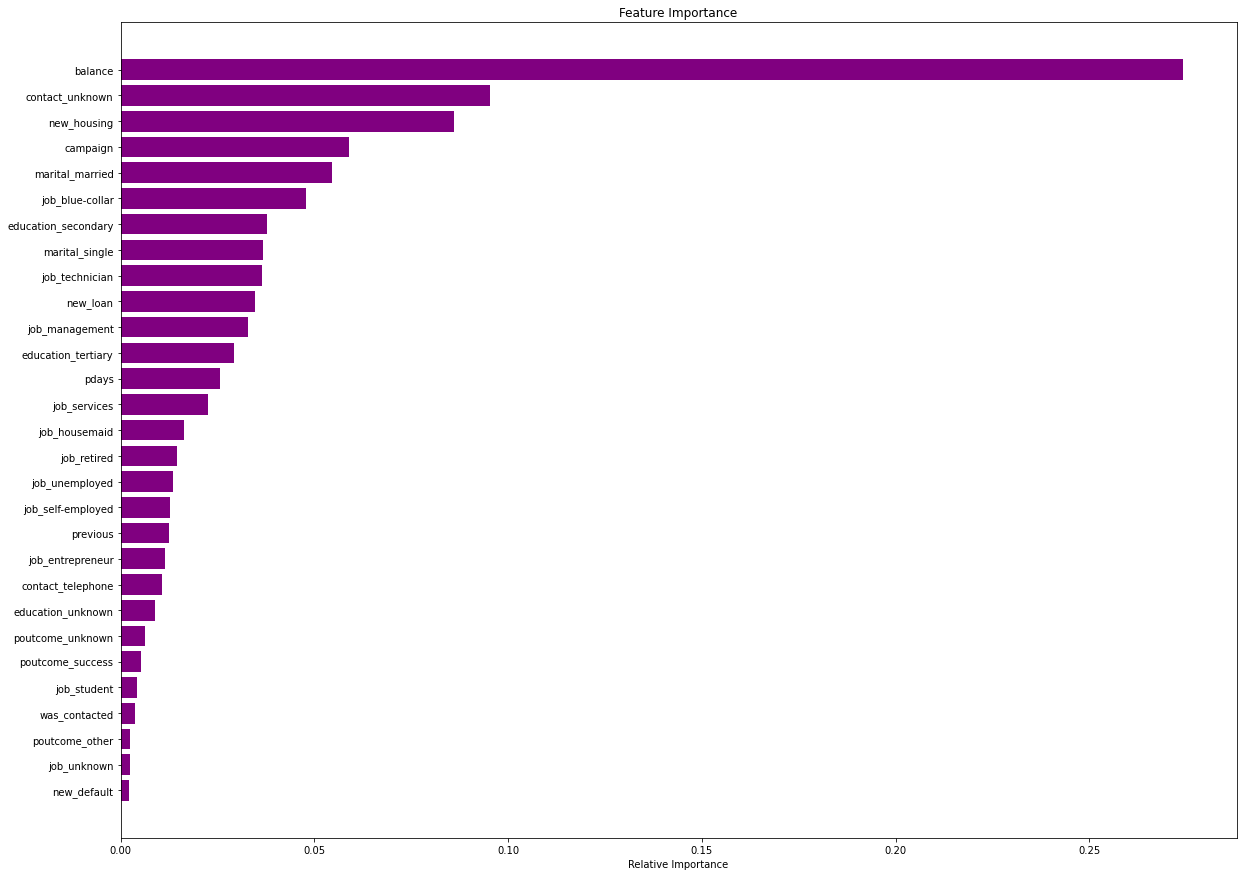

In [76]:
plt.figure(figsize=(20,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#**Hyperparameter Tuning**

In [77]:
## Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_dict = {
     "n_estimators":[50,100,200,250],
    "max_depth":[5,10,15],
    "min_samples_split":[50,100,150,200],
    "min_samples_leaf":[40,50,60]}

#Creating an instance of the RandomForestClassifier
rf_clf = RandomForestClassifier()

#random search
random_rf = RandomizedSearchCV(estimator=rf_clf,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc',n_iter=5,random_state=0)
random_rf.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   5.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   3.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   4.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   5.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   3.1s
[CV] END 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [40, 50, 60],
                                        'min_samples_split': [50, 100, 150,
                                                              200],
                                        'n_estimators': [50, 100, 200, 250]},
                   random_state=0, scoring='roc_auc', verbose=2)

In [78]:
#Best estimator for random forest
random_rf.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=40, min_samples_split=50)

In [79]:
random_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_depth': 15}

In [80]:
# Making predictions on test data
y_pred = random_rf.predict(x_test)

# Calculating accuracy on train and test
print(f'Training accuracy Score: {accuracy_score(y_train,random_rf.predict(x_train))}')
print(f'Testing accuracy Score: {accuracy_score(y_test,y_pred)}')

Training accuracy Score: 0.8587623220153341
Testing accuracy Score: 0.8525739320920044


In [81]:
# Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      9799
           1       0.82      0.88      0.85      8461

    accuracy                           0.85     18260
   macro avg       0.85      0.85      0.85     18260
weighted avg       0.86      0.85      0.85     18260



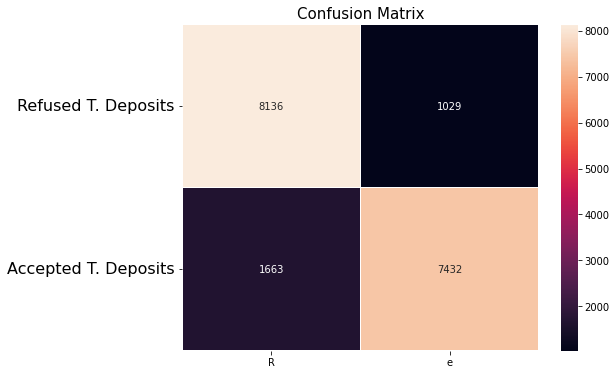

In [82]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt="d", linewidths=.5, ax=ax )
plt.title("Confusion Matrix", fontsize=15)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

##**ROC AOC Curve for Random Forest Classifier After Hyperparameric Tuning**

In [83]:
# getting the roc_score after Hyperparamer Tuning
random_rf_probability = random_rf.predict_proba(x_test)[:,1]
roc_socre=roc_auc_score(y_test, random_rf_probability)
roc_socre

0.9258333340831325

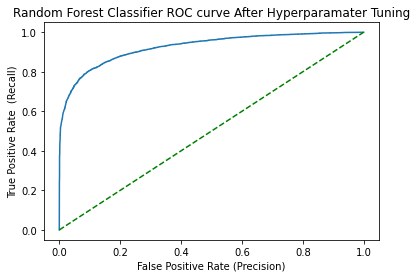

In [84]:
# plot the roc curve for the model
random_forest_FPR, random_forest_TPR,_ =  roc_curve(y_test, random_rf_probability)
plt.title('Random Forest Classifier ROC curve After Hyperparamater Tuning')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate  (Recall)')
plt.plot(random_forest_FPR,random_forest_TPR)
plt.plot((0,1), ls='dashed',color='green')
plt.show()

#**3) Decision Tree**


In [85]:
# Data fitting in Decision Tree model
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(x_train, y_train)

#prediction of test data
Decision_prediction = dec_tree_model.predict(x_test)
# Get the accuracy scores
decision_accuracy = accuracy_score(y_test,Decision_prediction)

#Checking the traning accuracy
print(f'Training accuracy Score : {dec_tree_model.score(x_train, y_train)}')
# checking the testing accuracy
print(f'Testing accuracy score : {decision_accuracy}')

Training accuracy Score : 0.9912559328221979
Testing accuracy score : 0.8791347207009858


In [86]:
# Classification report
print(classification_report(Decision_prediction,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      8848
           1       0.90      0.87      0.88      9412

    accuracy                           0.88     18260
   macro avg       0.88      0.88      0.88     18260
weighted avg       0.88      0.88      0.88     18260



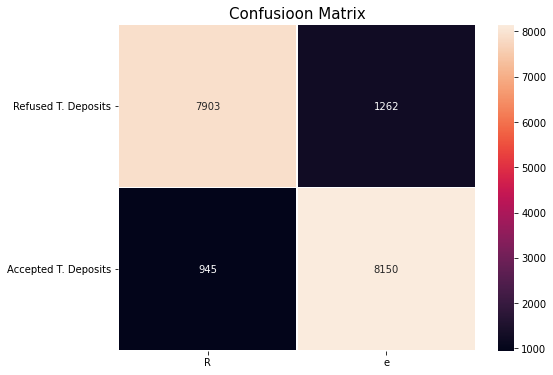

In [87]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,Decision_prediction)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt="d", linewidths=.5,ax=ax)
plt.title('Confusioon Matrix', fontsize=15)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(["Refused T. Deposits", "Accepted T. Deposits"],fontsize=10, rotation=360)
plt.show()

#**ROC AOC Curve for Decision Tree**

In [88]:
# getting the roc_score
dec_tree_probability = dec_tree_model.predict_proba(x_test)[:,1]
roc_socre=roc_auc_score(y_test, dec_tree_probability)
roc_socre

0.8842212542817269

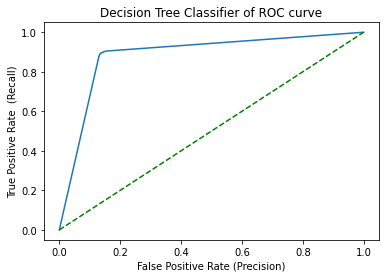

In [89]:
# plot the roc curve for the model
dec_tree_FPR, dec_tree_TPR,_ =  roc_curve(y_test, dec_tree_probability)
plt.title('Decision Tree Classifier of ROC curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate  (Recall)')
plt.plot(dec_tree_FPR,dec_tree_TPR)
plt.plot((0,1), ls='dashed',color='green')
plt.show()

##**Important Feature for Decision Tree**

In [90]:
dec_tree_model.feature_importances_

array([0.26879628, 0.06343818, 0.02081696, 0.00884514, 0.04262338,
       0.04883075, 0.02805901, 0.01098665, 0.01677256, 0.0235264 ,
       0.01611621, 0.01185298, 0.01769795, 0.00516928, 0.02460964,
       0.01373574, 0.00252494, 0.02576076, 0.0217067 , 0.0093767 ,
       0.0089966 , 0.15346789, 0.0022383 , 0.00640467, 0.00856152,
       0.00166475, 0.00131337, 0.04446976, 0.09163691])

In [91]:
features = df.columns
importances = dec_tree_model.feature_importances_
indices = np.argsort(importances)

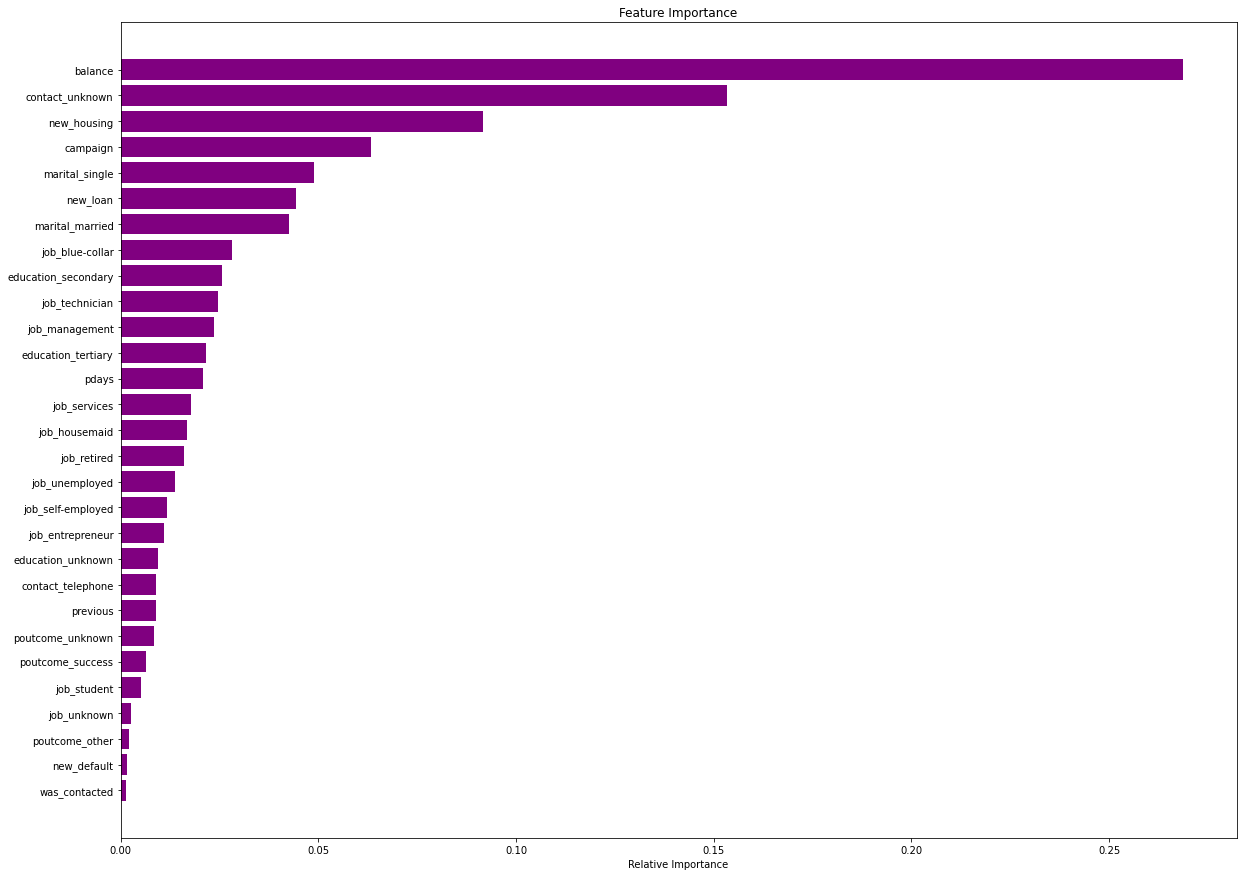

In [92]:
plt.figure(figsize=(20,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#**4) K-Nearest Neighbors (KNN)**

In [93]:
# Data fitting in KNN
K_model = KNeighborsClassifier()
K_model.fit(x_train, y_train)

#prediction of test data
K_model_prediction = K_model.predict(x_test)
# get the accuracy scores
k_model_accuracy = accuracy_score(y_test, K_model_prediction)

#Checking the traning accuracy
print(f'Training accuracy score : {K_model.score(x_train, y_train)}')
# checking the testing accuracy
print(f'Testing accuracy score : {k_model_accuracy}')

Training accuracy score : 0.9107155896312523
Testing accuracy score : 0.8808324205914567


In [94]:
# Classification report
print(classification_report(K_model_prediction,y_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      9235
           1       0.88      0.88      0.88      9025

    accuracy                           0.88     18260
   macro avg       0.88      0.88      0.88     18260
weighted avg       0.88      0.88      0.88     18260



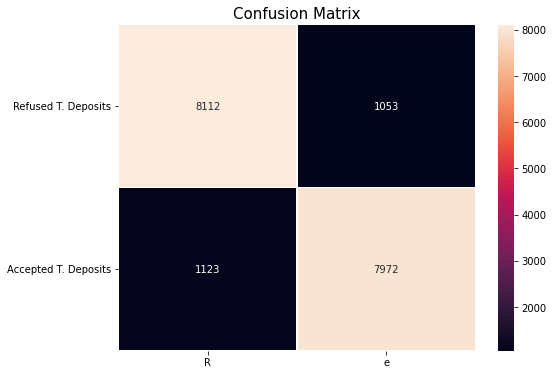

In [95]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,K_model_prediction)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt="d", linewidths=.5,ax=ax)
plt.title('Confusion Matrix', fontsize=15)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(["Refused T. Deposits", "Accepted T. Deposits"],fontsize=10, rotation=360)
plt.show()

##**ROC AOC Curve for K Neighbors**

In [96]:
# getting the roc_score
K_model_probability = K_model.predict_proba(x_test)[:,1]
roc_socre=roc_auc_score(y_test, K_model_probability)
roc_socre

0.9309029229263635

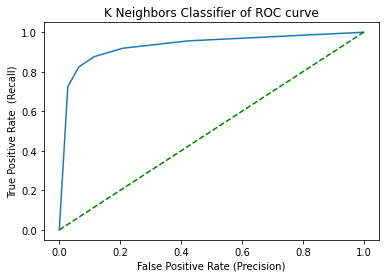

In [97]:
# plotting the roc curve for the model
KNN_FPR, KNN_TPR,_ = roc_curve(y_test, K_model_probability)
plt.title('K Neighbors Classifier of ROC curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate  (Recall)')
plt.plot(KNN_FPR, KNN_TPR)
plt.plot((0,1), ls='dashed',color='green')
plt.show()


#**5) XG Boost**

In [98]:
import xgboost as xgb
# Data fitting in xgboost model
XGB_model = xgb.XGBClassifier()
XGB_model.fit(x_train, y_train)

#prediction of test data
XGB_model_prediction = XGB_model.predict(x_test)
# get the accuracy scores
XGB_model_accuracy = accuracy_score(y_test, XGB_model_prediction)

#Checking the traning accuracy
print(f'Training accuracy score : {XGB_model.score(x_train, y_train)}')
# checking the testing accuracy
print(f'Testing accuracy score : {XGB_model_accuracy}')

Training accuracy score : 0.869258853596203
Testing accuracy score : 0.8640744797371304


In [99]:
# Classification report
print(classification_report(XGB_model_prediction,y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      9337
           1       0.85      0.87      0.86      8923

    accuracy                           0.86     18260
   macro avg       0.86      0.86      0.86     18260
weighted avg       0.86      0.86      0.86     18260



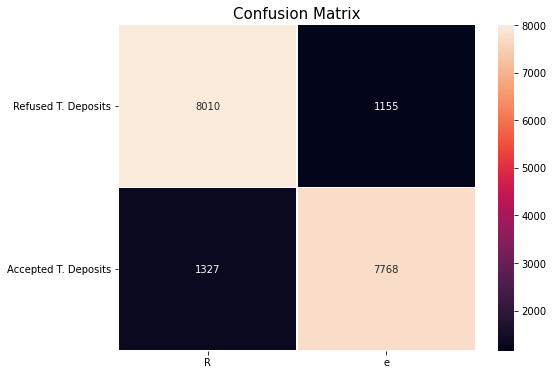

In [100]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,XGB_model_prediction)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt="d", linewidths=.5,ax=ax)
plt.title('Confusion Matrix', fontsize=15)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(["Refused T. Deposits", "Accepted T. Deposits"],fontsize=10, rotation=360)
plt.show()

##**ROC AOC Curve for XGBoost Classifier**

In [101]:
# getting the roc_score

Xgb_probability = XGB_model.predict_proba(x_test)[:,1]
roc_socre=roc_auc_score(y_test, Xgb_probability)
roc_socre

0.9337104882181086

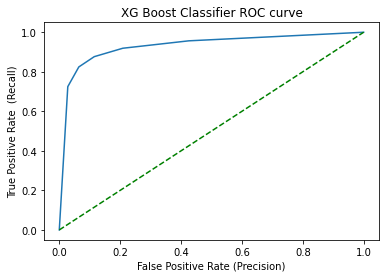

In [102]:
# plotting the roc curve for the XGB model
XGB_FPR, XGB_TPR,_ = roc_curve(y_test, K_model_probability)
plt.title('XG Boost Classifier ROC curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate  (Recall)')
plt.plot(XGB_FPR, XGB_TPR)
plt.plot((0,1), ls='dashed',color='green')
plt.show()

##**Important Feature for XG Boost Classifier**

In [103]:
XGB_model.feature_importances_

array([0.00086522, 0.03128251, 0.00110698, 0.0011875 , 0.03721268,
       0.0491196 , 0.05192693, 0.02449166, 0.03136192, 0.04793007,
       0.02337478, 0.02255664, 0.03002842, 0.0136471 , 0.04960639,
       0.02694777, 0.01139938, 0.03012627, 0.05642186, 0.02876384,
       0.02124171, 0.15113483, 0.00724329, 0.00782083, 0.05885626,
       0.00151659, 0.        , 0.08341295, 0.09941598], dtype=float32)

In [104]:
features = df.columns
importances = XGB_model.feature_importances_
indices = np.argsort(importances)

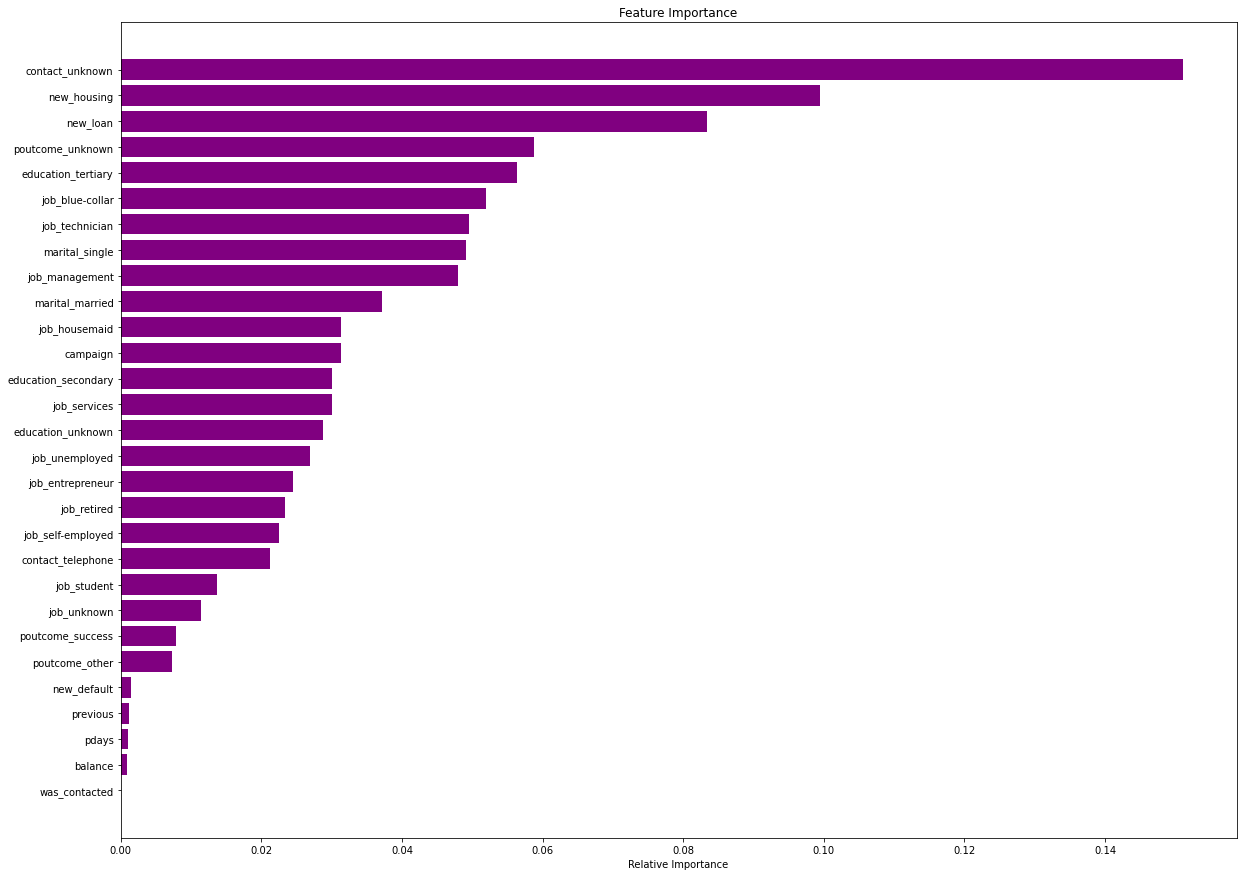

In [105]:
plt.figure(figsize=(20,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###**roc_auc_score for different classifiers**


In [106]:
print(f'Logistic_Regression score: {roc_auc_score(y_test, log_reg_probability)}')
print(f'Random Forest Classifier Score: {roc_auc_score(y_test, random_rf_probability)}')
print(f'Decision Tree Score: {roc_auc_score(y_test, dec_tree_probability)}')
print(f'XGB Classifier score: {roc_auc_score(y_test, Xgb_probability)}')
print(f'KNN Score: {roc_auc_score(y_test, K_model_probability)}')


Logistic_Regression score: 0.9338660565102497
Random Forest Classifier Score: 0.9258333340831325
Decision Tree Score: 0.8842212542817269
XGB Classifier score: 0.9337104882181086
KNN Score: 0.9309029229263635


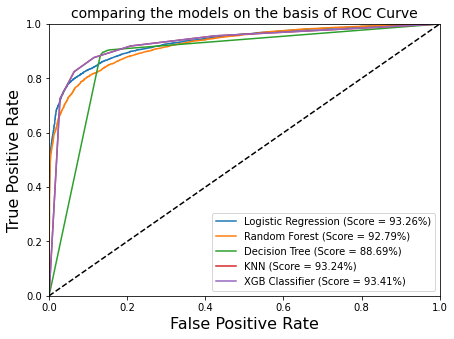

In [107]:
# plotting the roc curve of models
def graph_roc_curve_multiple(logistic_FPR, logistic_TPR,random_forest_FPR,random_forest_TPR,dec_tree_FPR,dec_tree_TPR, XGB_FPR,XGB_TPR,KNN_FPR,KNN_TPR):
    plt.figure(figsize=(7,5))
    plt.title('comparing the models on the basis of ROC Curve', fontsize=14)
    plt.plot(logistic_FPR, logistic_TPR, label='Logistic Regression (Score = 93.26%)')
    plt.plot(random_forest_FPR, random_forest_TPR, label='Random Forest (Score = 92.79%)')
    plt.plot(dec_tree_FPR, dec_tree_TPR, label='Decision Tree (Score = 88.69%)')
    plt.plot(KNN_FPR, KNN_TPR, label='KNN (Score = 93.24%)')
    plt.plot(XGB_FPR, XGB_TPR, label='XGB Classifier (Score = 93.41%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(logistic_FPR, logistic_TPR,random_forest_FPR, random_forest_TPR, dec_tree_FPR,dec_tree_TPR, XGB_FPR,XGB_TPR, KNN_FPR,KNN_TPR)
plt.show()

#**Conclusion**



* Blue-collar, management and technician showed maximum interest in subscription.  

* Divorce people have no interest in term deposit.

* The majority of the customers are between the ages of 30 and 40.

* The model can assist in identifying customers based on whether they have made deposits or not.

* Most people have home loans, but only a small percentage of them chose term deposits.

*  The outcome of the campaign is significantly influenced by the customer's account balance. We can then interact with those customers who have a balanced account balance.

* The model can assist in identifying customers based on whether they have made deposits or not.

* Instead of wasting time on the wrong customer, the model helps to target the right one.


* After implementing all the ML models We get maximum accuracy and ROC-AUC score in XGboost. So we can conclude that it is the best model for us.









